<a href="https://colab.research.google.com/github/shfarhaan/ml-notebooks/blob/main/Logistic-Regression%5C01_Logistic_Regression_with_Python%20v1.0.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

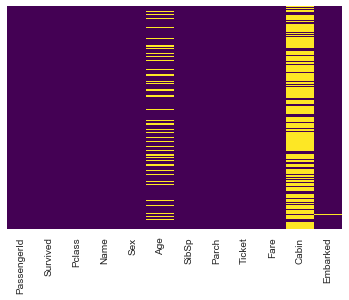

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The code provided appears to be using the `sns.heatmap` function from the Seaborn library in Python to create a heatmap of missing (null) values in a DataFrame called `train`. Let me explain each parameter of this function:

1. `train`: This is assumed to be a Pandas DataFrame containing your data, where you want to visualize missing values.

2. `.isnull()`: This is a Pandas DataFrame method that returns a DataFrame of the same shape as `train`, where each element is either `True` if the corresponding element in `train` is NaN (missing), or `False` otherwise.

3. `yticklabels=False`: This parameter is used to control whether or not to display the y-axis tick labels. In this case, `yticklabels` is set to `False`, so the y-axis tick labels will not be shown.

4. `cbar=False`: This parameter controls whether or not to display a color bar legend on the right side of the heatmap. Setting it to `False` means that there won't be a color bar legend.

5. `cmap='viridis'`: This parameter specifies the color map to be used for the heatmap. 'viridis' is one of the predefined colormaps in Seaborn, which ranges from deep purple (low values) to bright yellow (high values).

The `sns.heatmap` function will generate a heatmap where missing values are visually represented using colors (e.g., a specific color for missing values and another color for non-missing values). This can help you quickly identify patterns of missing data in your DataFrame.



Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"


<Axes: xlabel='Survived', ylabel='count'>

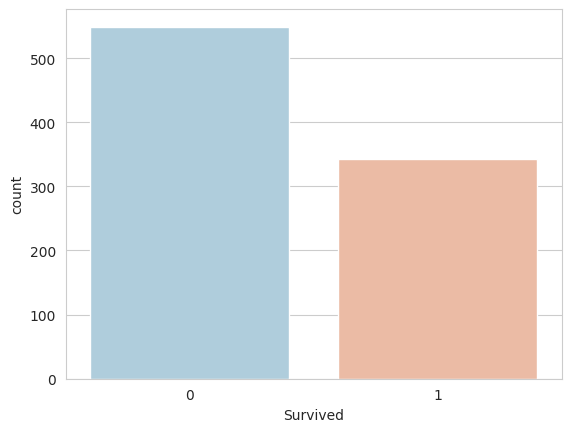

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

The code provided is using Seaborn to create a countplot based on the 'Survived' column in a DataFrame named `train`. Let me explain each part of the code:

1. `sns.set_style('whitegrid')`: This line sets the style of the Seaborn plots to 'whitegrid'. It affects the background and grid lines of the plot, making it easier to read and interpret the data.

2. `sns.countplot(x='Survived', data=train, palette='RdBu_r')`: This line creates a countplot using Seaborn's `countplot` function. Here's what each parameter does:

   - `x='Survived'`: This specifies the column in the `train` DataFrame that you want to plot on the x-axis. In this case, you are plotting the 'Survived' column, which likely contains binary data (0 or 1) indicating whether a person survived (1) or did not survive (0).

   - `data=train`: This specifies the DataFrame from which the data for the plot will be drawn, which is `train` in this case.

   - `palette='RdBu_r'`: This parameter specifies the color palette to be used for the plot. 'RdBu_r' is a diverging color palette, with one color for the positive values (survived) and another color for the negative values (not survived).

The resulting plot will be a bar chart showing the count of individuals who survived and did not survive. It will have two bars: one for survivors and one for non-survivors, with different colors indicating the two categories.



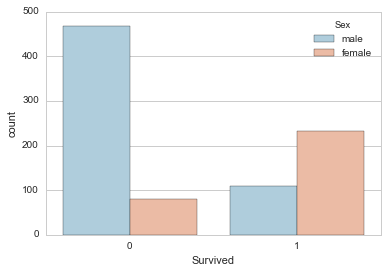

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

The code provided is creating a countplot using Seaborn to visualize the distribution of survivors and non-survivors in the `train` DataFrame, with the data further categorized by gender (Sex). Let's break down the code:

1. `sns.set_style('whitegrid')`: This line sets the style of the Seaborn plots to 'whitegrid', as mentioned earlier, affecting the background and grid lines of the plot.

2. `sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')`: This line creates a countplot with the following parameters:

   - `x='Survived'`: This specifies the column on the x-axis, which is 'Survived' in this case. 'Survived' is likely a binary column, indicating whether a person survived (1) or did not survive (0).

   - `hue='Sex'`: This parameter allows you to further categorize the data by gender (the 'Sex' column). It will create bars for each combination of survival status (Survived or Not Survived) and gender (Male or Female).

   - `data=train`: This specifies the DataFrame from which the data for the plot will be drawn, which is `train` in this case.

   - `palette='RdBu_r'`: This parameter specifies the color palette to be used for the plot. 'RdBu_r' is a diverging color palette, which is useful when you want to distinguish between two categories (survived and not survived) with different colors.

The resulting countplot will display bars for each combination of survival status and gender, showing how many individuals fall into each category. You will have four bars: Survived Male, Not Survived Male, Survived Female, and Not Survived Female, each with a different color based on the palette.



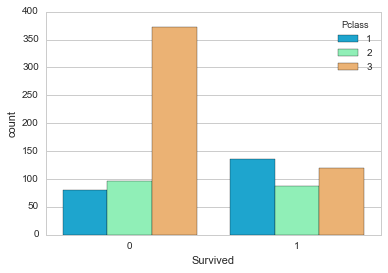

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

The code you've provided is creating a countplot using Seaborn to visualize the distribution of survivors and non-survivors in the `train` DataFrame, with the data further categorized by gender (Sex). Let's break down the code:

1. `sns.set_style('whitegrid')`: This line sets the style of the Seaborn plots to 'whitegrid', as mentioned earlier, affecting the background and grid lines of the plot.

2. `sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')`: This line creates a countplot with the following parameters:

   - `x='Survived'`: This specifies the column on the x-axis, which is 'Survived' in this case. 'Survived' is likely a binary column, indicating whether a person survived (1) or did not survive (0).

   - `hue='Sex'`: This parameter allows you to further categorize the data by gender (the 'Sex' column). It will create bars for each combination of survival status (Survived or Not Survived) and gender (Male or Female).

   - `data=train`: This specifies the DataFrame from which the data for the plot will be drawn, which is `train` in this case.

   - `palette='RdBu_r'`: This parameter specifies the color palette to be used for the plot. 'RdBu_r' is a diverging color palette, which is useful when you want to distinguish between two categories (survived and not survived) with different colors.

The resulting countplot will display bars for each combination of survival status and gender, showing how many individuals fall into each category. You will have four bars: Survived Male, Not Survived Male, Survived Female, and Not Survived Female, each with a different color based on the palette.



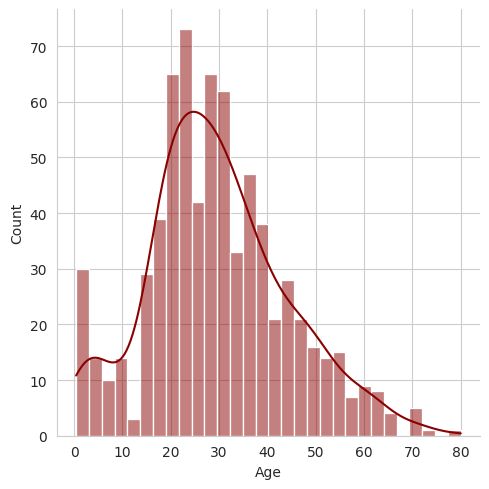

In [ ]:
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=30)


1. `sns.displot`: This is the Seaborn function used to create a distribution plot.

2. `train['Age'].dropna()`: This part extracts the 'Age' column from your DataFrame (`train`) and then uses `dropna()` to remove any rows with missing values in the 'Age' column. This is done to ensure that the plot only includes valid age values.

3. `kde=False`: This parameter specifies that you do not want to overlay a Kernel Density Estimation (KDE) plot on top of the histogram. If you set `kde=True`, it would add a smoothed line representing the estimated probability density function.

4. `color='darkred'`: This sets the color of the bars in the histogram to 'darkred'. You can change this color to any other valid color name or code.

5. `bins=30`: This parameter controls the number of bins (intervals) into which the data range is divided. In this case, you've set it to 30, meaning the histogram will have 30 bars.



<Axes: >

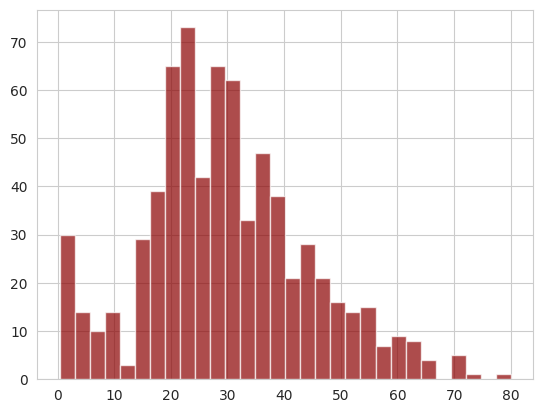

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

The code provided is creating a histogram for the 'Age' column in the `train` DataFrame. Here's a breakdown of the code:

1. `train['Age']`: This selects the 'Age' column from the `train` DataFrame, assuming that the 'Age' column contains numerical data representing the ages of individuals in your dataset.

2. `.hist(bins=30, color='darkred', alpha=0.7)`: This code is calling the `hist` method on the selected 'Age' column and specifying several parameters:

   - `bins=30`: This parameter specifies the number of bins (intervals) that the data will be divided into for the histogram. In this case, it's set to 30, which means you'll have 30 bars in the histogram, each representing a range of ages.

   - `color='darkred'`: This parameter sets the color of the bars in the histogram to 'darkred'.

   - `alpha=0.7`: This parameter controls the transparency of the bars. An alpha value of 0.7 makes the bars somewhat transparent, allowing you to see overlapping bars more clearly if they exist.

The resulting plot will be a histogram showing the distribution of ages in your dataset. Each bar represents a range of ages (a bin), and the height of the bar indicates the number of individuals in that age range. The 'darkred' color and transparency (alpha) are used for visualization purposes.



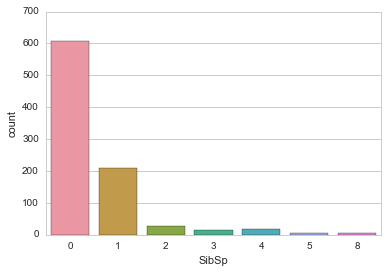

In [ ]:
sns.countplot(x='SibSp',data=train)

The code provided is using Seaborn to create a countplot of the 'SibSp' column in the `train` DataFrame. Let's break down the code:

1. `sns.countplot(x='SibSp', data=train)`: This line of code is creating a countplot using Seaborn's `countplot` function with the following parameters:

   - `x='SibSp'`: This specifies the column on the x-axis of the plot. In this case, it's the 'SibSp' column, which likely represents the number of siblings/spouses a person has on board.

   - `data=train`: This specifies the DataFrame from which the data for the plot will be drawn, which is `train` in this case.

The resulting plot will be a bar chart that displays the count of individuals for each value in the 'SibSp' column. Each bar represents a specific number of siblings/spouses, and the height of the bar indicates how many individuals have that particular number of siblings/spouses.

This type of plot is useful for understanding the distribution of a categorical variable, in this case, the number of siblings/spouses. You can further customize the plot by adding labels, titles, adjusting the figure size, or changing the colors as needed. If you're working in a Jupyter Notebook or a similar environment, you may want to use `plt.show()` to display the plot.

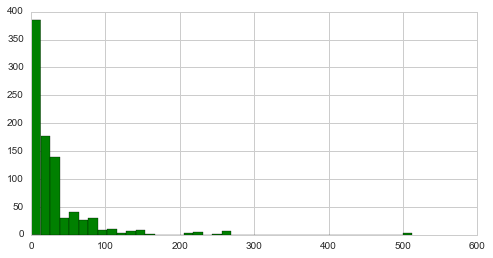

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

The code provided is creating a histogram for the 'Fare' column in the `train` DataFrame. Here's a breakdown of the code:

1. `train['Fare']`: This selects the 'Fare' column from the `train` DataFrame, which likely represents the fares paid by passengers.

2. `.hist(color='green', bins=40, figsize=(8, 4))`: This code is calling the `hist` method on the selected 'Fare' column and specifying several parameters:

   - `color='green'`: This parameter sets the color of the bars in the histogram to 'green'.

   - `bins=40`: This parameter specifies the number of bins (intervals) that the data will be divided into for the histogram. In this case, it's set to 40, which means you'll have 40 bars in the histogram, each representing a range of fare values.

   - `figsize=(8, 4)`: This parameter sets the size of the figure (the width and height of the plot) to (8, 4) inches.

The resulting plot will be a histogram showing the distribution of fares in your dataset. Each bar represents a range of fare values, and the height of the bar indicates the number of individuals with fares falling within that range.

The 'green' color is used for the bars in the histogram. You can further customize the plot by adding labels, titles, adjusting the figure size, or changing the colors as needed. If you're working in a Jupyter Notebook or a similar environment, you can use `plt.show()` to display the plot.

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


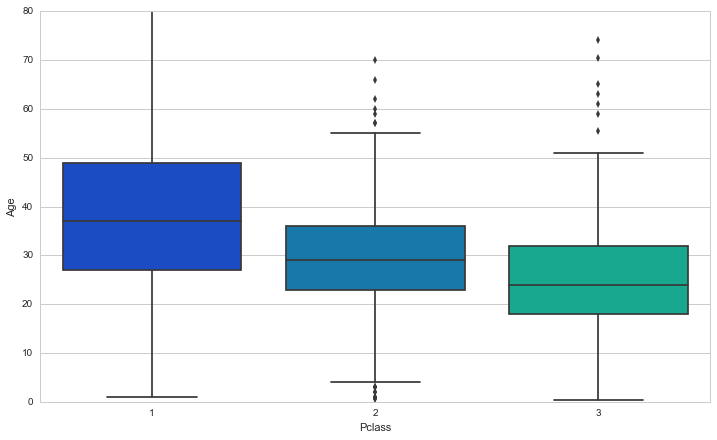

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The code provided is creating a boxplot using Seaborn to visualize the distribution of ages ('Age') across different passenger classes ('Pclass') in the `train` DataFrame. Here's a breakdown of the code:

1. `plt.figure(figsize=(12, 7))`: This line sets the figure size for the plot to (12, 7) inches. It's specifying the width and height of the figure.

2. `sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')`: This line creates a boxplot using Seaborn's `boxplot` function with the following parameters:

   - `x='Pclass'`: This specifies the column on the x-axis, which is 'Pclass' in this case. 'Pclass' typically represents the passenger class (1st, 2nd, or 3rd class).

   - `y='Age'`: This specifies the column on the y-axis, which is 'Age' in this case. 'Age' represents the age of passengers.

   - `data=train`: This specifies the DataFrame from which the data for the plot will be drawn, which is `train` in this case.

   - `palette='winter'`: This parameter specifies the color palette to be used for the plot. 'winter' is one of Seaborn's predefined color palettes.

The resulting plot will be a boxplot that shows the distribution of ages within each passenger class. Each box represents a passenger class, with the box's height indicating the interquartile range (IQR) of ages in that class. The line inside the box represents the median age, and any points beyond the "whiskers" (the lines extending from the boxes) may be considered outliers.

This type of plot is useful for comparing the distribution of a continuous variable (age) across different categories (passenger classes) and identifying any potential differences or outliers.



We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        # If the 'Age' value is missing (null):

        if Pclass == 1:
            return 37  # Impute the age as 37 for passengers in 1st class.

        elif Pclass == 2:
            return 29  # Impute the age as 29 for passengers in 2nd class.

        else:
            return 24  # Impute the age as 24 for passengers in 3rd class.

    else:
        # If the 'Age' value is not missing, return the original age value.
        return Age


Here's how this function works:

- It takes a single argument `cols`, which is expected to be a tuple or list containing two elements: 'Age' and 'Pclass'.

- Inside the function, it extracts the 'Age' and 'Pclass' values from the `cols` tuple or list.

- It checks whether the 'Age' value is missing (null) using `pd.isnull(Age)`. If the age is missing, it imputes (fills in) an age value based on the passenger class:
  - If the passenger is in 1st class (Pclass == 1), it imputes the age as 37.
  - If the passenger is in 2nd class (Pclass == 2), it imputes the age as 29.
  - If the passenger is in 3rd class (Pclass == 3), it imputes the age as 24.

- If the 'Age' value is not missing, it simply returns the original age value.

This function can be used with the Pandas `apply` method to impute missing ages in a DataFrame by applying this function to each row where 'Age' is missing, using the corresponding 'Pclass' value to determine the imputed age.

Now apply that function!

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

The code provided is using the Pandas `apply` method to impute missing values in the 'Age' column of the `train` DataFrame based on the 'Pclass' column using the `impute_age` function you defined earlier. Here's an explanation of what this code does:

- `train[['Age', 'Pclass']]` creates a new DataFrame containing only the 'Age' and 'Pclass' columns from the original `train` DataFrame. This new DataFrame has two columns: 'Age' and 'Pclass'.

- `.apply(impute_age, axis=1)` applies the `impute_age` function to each row in the new DataFrame along `axis=1`, meaning it applies the function to each row (as opposed to applying it column-wise).

  - For each row, it passes a tuple `(Age, Pclass)` to the `impute_age` function, where `Age` is the 'Age' value from that row, and `Pclass` is the 'Pclass' value from that row.

  - The `impute_age` function, as defined earlier, checks whether 'Age' is missing (null) and imputes an age based on the passenger class ('Pclass') if 'Age' is missing, or returns the original 'Age' if it's not missing.

  - The result of this operation is a new 'Age' column in the `train` DataFrame, where missing 'Age' values have been imputed based on the corresponding 'Pclass' values.

This code effectively fills in missing age values in the 'Age' column of the `train` DataFrame using the logic you defined in the `impute_age` function.

Now let's check that heat map again!

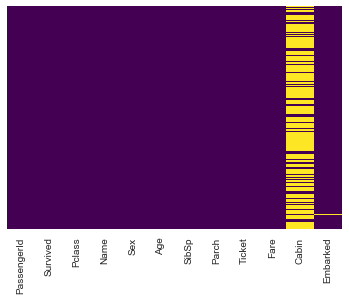

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!